In [1]:
from importlib import reload
import soundings.readsoundings
reload(soundings.readsoundings)
from soundings.readsoundings import readsound
import pandas as pd
from matplotlib import pyplot as plt

In [51]:
import glob
out=glob.glob('../*soundings/*july*txt')
sounding_dict=readsound(out[0])
dict_keys=list(sounding_dict.keys())
print(dict_keys[:3])
print(sounding_dict[dict_keys[0]].head())

[datetime.datetime(2006, 7, 1, 12, 0, tzinfo=datetime.timezone.utc), datetime.datetime(2006, 7, 2, 12, 0, tzinfo=datetime.timezone.utc), datetime.datetime(2006, 7, 3, 0, 0, tzinfo=datetime.timezone.utc)]
     pres  hght  temp  dwpt  relh      mixr  drct  sknt   thta   thte   thtv
0  1019.0    17   7.8   7.2    96  6.259532   260     2  279.4  296.8  280.5
1  1000.0   172  10.2   9.6    96  7.520819   355     2  283.4  304.4  284.6
2   984.1   305   9.8   9.1    95  7.387889   335     3  284.2  304.9  285.5
3   948.9   610  13.0   4.1    55  5.414907   320     5  290.5  306.3  291.4
4   930.0   778  14.8   3.8    48  5.409656   328     7  294.0  310.0  294.9


In [39]:
outfile='july.h5'
with pd.HDFStore(outfile,'w') as store:
    for key,value in sounding_dict.items():
        thetime=key.strftime("Y%Y_%b_%d_%HZ")
        store.put(thetime,value,format='table')
        

In [52]:
with pd.HDFStore(outfile,'r') as store:
    sounding=store['Y2006_Jul_12_00Z']
    print(sounding.loc[:5])


     pres  hght  temp  dwpt  relh        mixr  drct  sknt   thta   thte   thtv
0  1009.0    17  14.2  11.9    86 -670.597195   110     9  286.6  311.1  288.1
1   974.5   305  11.5   9.3    86 -678.470149   130    11  286.7  308.1  288.1
2   925.0   740   8.4   6.4    87 -688.247660   150    10  287.9  306.6  289.0
3   878.0  1169   5.2   5.1    99 -691.089949   180    16  288.9  307.0  290.0
4   850.0  1434   5.2   4.6    96 -691.279831   190    17  291.6  309.9  292.7
5   827.0  1658   5.0   4.7    98 -688.684568   196    16  293.7  312.7  294.8


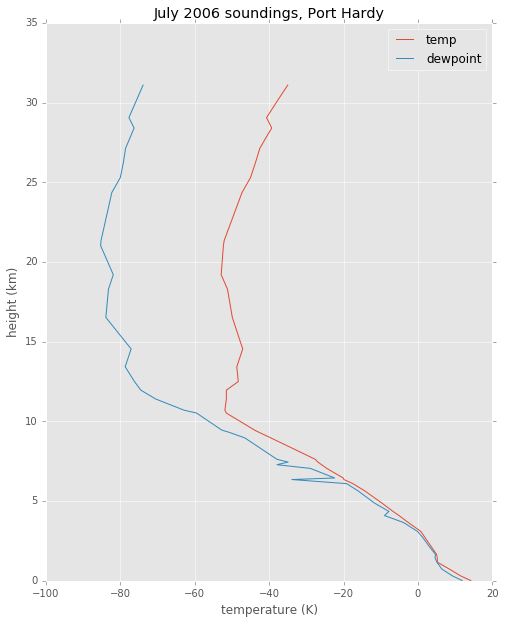

In [55]:
%matplotlib inline
m2km=1.e-3  #convert meters to km
plt.style.use('ggplot')
fig,ax=plt.subplots(1,1,figsize=(8,10))
ax.plot(sounding['temp'],sounding['hght']*m2km,label='temp')
ax.plot(sounding['dwpt'],sounding['hght']*m2km,label='dewpoint')
ax.legend()
out=ax.set(xlabel="temperature (K)",ylabel="height (km)",
      title ="July 2006 soundings, Port Hardy")